In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.cluster import KMeans
import seaborn as sns

def load_data(filepath):                        #loads file and removes the rows with missing values
    df = pd.read_csv(filepath)
    return df

def preprocess_data(df):
    df = df.dropna()
    df = pd.get_dummies(df, drop_first=True)
    return df

def split_data(df, target_column='price'):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute % Error: {mape:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return y_pred

def load_and_preprocess_for_clustering(filepath):
    df = pd.read_csv(filepath)
    df = df.dropna()
    if 'price' in df.columns:
        df = df.drop('price', axis=1)
    df = pd.get_dummies(df, drop_first=True)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled, df  # return both scaled data and original for reference

def plot_elbow_curve(data):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()
    
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data)
    return clusters


In [2]:
# A1: Predict price using listings.csv

filepath = r"C:\Users\dhruv\OneDrive\Desktop\ml\listings.csv"
df = load_data(filepath)
df = preprocess_data(df)
X_train, X_test, y_train, y_test = split_data(df, target_column='price')
model = train_model(X_train, y_train)

In [3]:
# A2: Evaluate the model and predict on test data

y_pred = evaluate_model(model, X_test, y_test)

Mean Squared Error: 6530911.58
Mean Absolute % Error: 1.47
Root Mean Squared Error: 2555.56
R² Score: 0.01


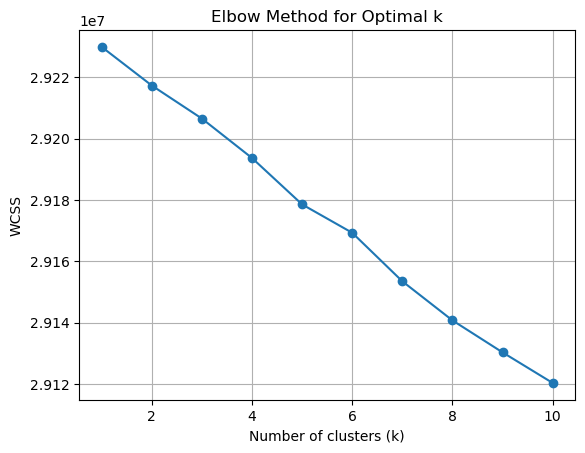

       id  host_id   latitude  longitude  minimum_nights  number_of_reviews  \
7    7097    17571  40.691940 -73.973890               2                413   
14  12937    50124  40.747570 -73.945710               2                445   
20  16580    64442  40.723727 -73.976259               1                642   
21  16821     4396  40.722810 -73.985010               1                263   
42  29628   127608  40.682920 -73.963810               3                470   

    reviews_per_month  calculated_host_listings_count  availability_365  \
7                2.20                               2                 4   
14               2.43                               1               183   
20               4.46                               2               208   
21               1.68                               2                18   
42               2.57                               1               103   

    number_of_reviews_ltm  ...  license_ose-strreg-0000774  \
7           

In [ ]:
#A4 : K means clustering (removing the target variable : price)

data_scaled, original_df = load_and_preprocess_for_clustering(filepath)
plot_elbow_curve(data_scaled)
k = 3
clusters = perform_kmeans(data_scaled, k)
original_df['Cluster'] = clusters
print(original_df.head())
if original_df.shape[1] >= 2:
    sns.pairplot(original_df, hue='Cluster', palette='Set1')
    plt.show()